Exploratory data analysis

In [556]:
import pandas as pd
a=pd.read_csv("Information.csv",encoding='latin-1')

In [557]:
a.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [558]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

Data cleaning

In [559]:
a.drop(["profile_yn_gold","tweet_coord","gender_gold"],axis=1,inplace=True)

In [560]:
a.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'link_color', 'name', 'profileimage', 'retweet_count', 'sidebar_color',
       'text', 'tweet_count', 'tweet_created', 'tweet_id', 'tweet_location',
       'user_timezone'],
      dtype='object')

Featrues selection

In [561]:
a=a.loc[:,['gender','gender:confidence','description','text','_trusted_judgments','name']]
a=a[a['gender:confidence']==1]


In [562]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 0 to 20049
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              13926 non-null  object 
 1   gender:confidence   13926 non-null  float64
 2   description         11845 non-null  object 
 3   text                13926 non-null  object 
 4   _trusted_judgments  13926 non-null  int64  
 5   name                13926 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 761.6+ KB


In [563]:
a=a[a.description.notnull()]
a.shape

(11845, 6)

Removing outliers replacing them with median

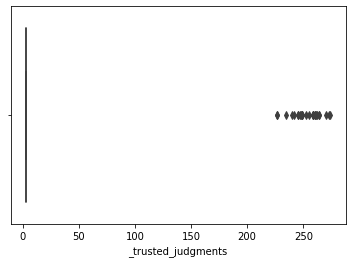

In [564]:
import seaborn as sea
import numpy as np
sea.boxplot(a['_trusted_judgments'])

In [565]:
median=a.loc[:,'_trusted_judgments'].median()
a['_trusted_judgments']=median

In [566]:
a

,gender,gender:confidence,description,text,_trusted_judgments,name
0,male,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,3.0,sheezy0
1,male,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,3.0,DavdBurnett
3,male,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,3.0,douggarland
4,female,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,3.0,WilfordGemma
5,female,1.0,you don't know me.,"Ive seen people on the train with lamps, chair...",3.0,monroevicious
...,...,...,...,...,...,...
20044,female,1.0,I Love Me...Myself....&....I,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,3.0,Bigbootyyjudy_
20045,female,1.0,(rp),"@lookupondeath ...Fine, and I'll drink tea too...",3.0,capuletrosa
20046,male,1.0,"Whatever you like, it's not a problem at all. ...",Greg Hardy you a good player and all but don't...,3.0,BenNight41
20047,male,1.0,#TeamBarcelona ..You look lost so you should f...,You can miss people and still never want to se...,3.0,realuzzyfluxz


from here we are applying nailbaised algorithium

In [553]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
list_of_stopwords=stopwords.words("English")

In [554]:
clean_description=[]
s=["...","!","https",":","JordanSpieth","#","-","(",")","`",",","Xxxx",".","Xxxxxxx","//",";","//t.co/S5mFPA1vgK","http"
  "?","/","//t.co/H68ou5PE9L","//t.co/CIzCANPQFz","ÛÏIt","_Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_ÙÈ_ÙÔ_ÙÈ","Xxx","//t.co/S5mFPA1vgK","//t.co/MPUuQtYF1g"
  "themÛ","BpackEngineer","å£241m","byÛ_","_Aphmau_","JMKM_Òü","//t.co/G7bSTG9ICv","ÛÊ","V","//t.co/LmMiOwenQQ","ASMSG",
  "//t.co/gIHIVyHF7G","//t.co/MPUuQtYF1g","|","Ïö","TheFullBleed","SciFiTalk","GeekLegacy","The7thMatrix","x100pre",
  "_ü","?","[","]","Û¢Û¢","÷üå©","gmail.com","Insta","07508547008","//t.co/ABfaK2iDjb","usatoday.com","xxxx",
  "æáæ¡æü","µµµµµµ","µæü","è¢µÑå¼p","èÁæüæüæü'À","µÑæ¡µä","Ä£FreeZa","Ä£RIPNAZERAH_ü","//t.co/DTWyrMizAu",
  "ªÁ","||","~","R_ü|","//t.co/GaYp6dFfH0","//","\\","//t.co/Tfn1qzIp29","//t.co/iyPSgSv70z","»","smpromngr.co.uk",
  "÷¼ü","732//303","@","//t.co/KPG0UX7vyk","Û_ Peace","//t.co/3OJ5ZIVzny",'_',"=\\=","KB","«","//t.co/ZaMI4t2PcV",
  "//t.co/H43HTRNyJ7","//t.co/ybODPzSUJA","{","}","//t.co/OMOl9oQMj8","ë_ëÕë£","_ü_ü_ü_ü","Û¢","//t.co/lAGLmKjKkm",
  "//t.co/Vb6s8Yj70e","http","//t.co/wBwNqj3IWT","//t.co/BN7SdbjB97","..","ÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛ","ÊÛÊÛÊÛÊÛÊÛÊÛor",
  "ª´÷¼ã¢","//t.co/Olk38YK7zC","Ï¤","/èödoæ_æÕkÓ","//t.co/6lzW8WUGzq","16//Megan","Fox//Halsey//B","//t.co/bcUc9F87iK",
  "//t.co/tTpCQlSRZJ","//t.co/wdWFhmKgrU","//t.co/6yaUxTye9n","//t.co/7iviKsg0Z5","//t.co/KAvPcHr69v","--","%","20/bi",
  "//t.co/zS63yVU5uK","*~||","//t.co/vgxbI36xPH","//t.co/gTzI3PCZwS","//t.co/dfqnvRvbM2","=\\=","//t.co/KNUwaqG2x1","//t.co/YeGw9bkUG8"]
for i in range(a.shape[0]):
    current_description=a["description"].values[i]
    tokenized_word=word_tokenize(current_description)
    clean_message=""
    for i in tokenized_word:
        if i not in  s:
            if i not in list_of_stopwords:
                clean_message+=" "+i     
    #print("current description  :",clean_message)
    clean_description.append(clean_message)


In [555]:
a["clean_description"]=clean_description

In [521]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [522]:
df=cv.fit_transform(a["clean_description"])

In [523]:
df

<11845x26729 sparse matrix of type '<class 'numpy.int64'>'
	with 111063 stored elements in Compressed Sparse Row format>

In [524]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df,a["gender"],train_size=0.8)

In [525]:
from sklearn.naive_bayes import MultinomialNB
naive=MultinomialNB()

In [526]:
naive.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [527]:
Y_predicted_value=naive.predict(X_test)

In [528]:
from sklearn.metrics import accuracy_score

In [529]:
accuracy_score(Y_predicted_value,Y_test)

0.6758125791473195

Here we got accuracy of naive_byes algorithium

from here we will do random forest model implimentation

here we are doing label encoding of column-"gender" and we genrate a new encoded column-"gender_E" which we use in svm and random forest.

In [530]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
a["gender_E"]=lb.fit_transform(a["gender"])

In [531]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,Y_train,Y_test=train_test_split(df,a["gender_E"],train_size=0.8)

In [532]:
ran=RandomForestClassifier(n_estimators=150)

In [533]:
ran.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [534]:
Y_predicted=ran.predict(X_test)

In [535]:
accuracy_score(Y_predicted,Y_test)

0.6323343182777543

here we got accuracy of random_forest model

here we use support vector machine model(svm)

In [536]:
from sklearn.svm import SVC
svm=SVC()

In [537]:
svm.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [538]:
Y_predict=svm.predict(X_test)

In [539]:
accuracy_score(Y_predict,Y_test)

0.6433094132545378

Here we got support vector machine accuracy

so we got that naive_byes algorithium have much better accuracy in compare than random forest and support vector machine algorithium

From here we will solve-question-1 as What are the most common emotions/words used by Males and Females?

In [540]:
clean_text=[]
s=["...","!","https",":","JordanSpieth","#","-","(",")","`",",","Xxxx",".","Xxxxxxx","//",";","//t.co/S5mFPA1vgK","http"
  "?","/","//t.co/H68ou5PE9L","//t.co/CIzCANPQFz","ÛÏIt","_Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_ÙÈ_ÙÔ_ÙÈ","Xxx","//t.co/S5mFPA1vgK","//t.co/MPUuQtYF1g"
  "themÛ","BpackEngineer","å£241m","byÛ_","_Aphmau_","JMKM_Òü","//t.co/G7bSTG9ICv","ÛÊ","V","//t.co/LmMiOwenQQ","ASMSG",
  "//t.co/gIHIVyHF7G","//t.co/MPUuQtYF1g","|","Ïö","TheFullBleed","SciFiTalk","GeekLegacy","The7thMatrix","x100pre",
  "_ü","?","[","]","Û¢Û¢","÷üå©","gmail.com","Insta","07508547008","//t.co/ABfaK2iDjb","usatoday.com","xxxx",
  "æáæ¡æü","µµµµµµ","µæü","è¢µÑå¼p","èÁæüæüæü'À","µÑæ¡µä","Ä£FreeZa","Ä£RIPNAZERAH_ü","//t.co/DTWyrMizAu",
  "ªÁ","||","~","R_ü|","//t.co/GaYp6dFfH0","//","\\","//t.co/Tfn1qzIp29","//t.co/iyPSgSv70z","»","smpromngr.co.uk",
  "÷¼ü","732//303","@","//t.co/KPG0UX7vyk","Û_ Peace","//t.co/3OJ5ZIVzny",'_',"=\\=","KB","«","//t.co/ZaMI4t2PcV",
  "//t.co/H43HTRNyJ7","//t.co/ybODPzSUJA","{","}","//t.co/OMOl9oQMj8","ë_ëÕë£","_ü_ü_ü_ü","Û¢","//t.co/lAGLmKjKkm",
  "//t.co/Vb6s8Yj70e","http","//t.co/wBwNqj3IWT","//t.co/BN7SdbjB97","..","ÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛ","ÊÛÊÛÊÛÊÛÊÛÊÛor",
  "ª´÷¼ã¢","//t.co/Olk38YK7zC","Ï¤","/èödoæ_æÕkÓ","//t.co/6lzW8WUGzq","16//Megan","Fox//Halsey//B","//t.co/bcUc9F87iK",
  "//t.co/tTpCQlSRZJ","//t.co/wdWFhmKgrU","//t.co/6yaUxTye9n","//t.co/7iviKsg0Z5","//t.co/KAvPcHr69v","--","%","20/bi",
  "//t.co/zS63yVU5uK","*~||","//t.co/vgxbI36xPH","//t.co/gTzI3PCZwS","//t.co/dfqnvRvbM2","=\\=","//t.co/KNUwaqG2x1","//t.co/YeGw9bkUG8"
  "weakkkkk_Ù÷â_Ù÷â_Ù÷â_Ù÷â_Ù÷â","allllllllllllllll","//t.co/Vmb0OZU67e","//t.co/hFlWR8tfOl","''","``",'//t.co/cSFrMdI93i',
  "TheZodiacKiller","//t.co/OTmkSWavhY","//t.co/piTapsTzbj","*****",'//t.co/NSybBmVjKZ']
for i in range(a.shape[0]):
    current_text=a["text"].values[i]
    tokenized_word=word_tokenize(current_text)
    clean_message=""
    for i in tokenized_word:
        if i not in  s:
            if i not in list_of_stopwords:
                clean_message+=" "+i     
#     print("current text  :",clean_message)
    clean_text.append(clean_message)


In [501]:
a["clean_text"]=clean_text

In [502]:
male=a[a["gender"]=="male"]
g_M={}
for i in range(male.shape[0]):
    h=male["clean_text"].values[i].split()
    for j in range(len(h)):
        if h[j] in g_M:
            g_M[h[j]]+=1
        else:
            g_M[h[j]]=1
#know we try to sort it 
male_tweet=[]
for key in g_M:
    male_tweet.append((g_M[key],key))

male_tweet.sort(reverse=True)


male_tweet[0],male_tweet[16] 

((1403, 'I'), (112, 'love'))

Here i got that most commom word for male is "I" and most emotional word is "Love"

In [505]:
Female=a[a["gender"]=="female"]
g_F={}
for i in range(Female.shape[0]):
    h=Female["clean_text"].values[i].split()
    for j in range(len(h)):
        if h[j] in g_F:
            g_F[h[j]]+=1
        else:
            g_F[h[j]]=1
#know we try to sort it 
Female_tweet=[]
for key in g_F:
    Female_tweet.append((g_F[key],key))

Female_tweet.sort(reverse=True)


 
Female_tweet[0],Female_tweet[11]        

((2271, 'I'), (182, 'love'))

Here we got that most common word in Female gender is "I" and most emotional word is "Love"

-------------------------------------------------------------------------------------------------------

here we made 2-question by own as "Which Gender has a greater number of tweets count? on an average what is the tweet_count by each gender?"

In [1]:
import pandas as pd
b=pd.read_csv("Information.csv",encoding='latin-1')
b=b.loc[:,['gender','gender:confidence','description','text','_trusted_judgments','name','tweet_count']]
b=b[b["gender"].notnull()]
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19953 entries, 0 to 20049
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              19953 non-null  object 
 1   gender:confidence   19953 non-null  float64
 2   description         16224 non-null  object 
 3   text                19953 non-null  object 
 4   _trusted_judgments  19953 non-null  int64  
 5   name                19953 non-null  object 
 6   tweet_count         19953 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ MB


In [2]:
b.gender.unique()

array(['male', 'female', 'brand', 'unknown'], dtype=object)

In [3]:
male=b[b["gender"]=="male"]
male_tweet_count=sum(male["tweet_count"])

In [4]:
Female=b[b["gender"]=="female"]
Female_tweet_counts=sum(Female["tweet_count"])

In [5]:
brand=b[b["gender"]=="brand"]
brand_tweet_count=sum(brand["tweet_count"])

In [6]:
unknown=b[b["gender"]=="unknown"]
unknown_tweet_count=sum(unknown["tweet_count"])

In [7]:
print("Female_tweet_counts    :",Female_tweet_counts)
print("male_tweet_counts    :",male_tweet_count)
print("brand_tweet_count    :",brand_tweet_count)
print("unknown_tweet_count     :",unknown_tweet_count)

Female_tweet_counts    : 182821554
male_tweet_counts    : 196947006
brand_tweet_count    : 357391498
unknown_tweet_count     : 39498482


In [8]:
brand_tweet_count>male_tweet_count>Female_tweet_counts>unknown_tweet_count

True

so we got that "brand" are doing more tweets_count

In [9]:
Total_male_candidate=male.shape[0]
Total_Female_candidate=Female.shape[0]
Total_brand_candidate=brand.shape[0]
Total_unknown_candidate=unknown.shape[0]

In [10]:
average_of_tweet_count_by_each_male=int(male_tweet_count/Total_male_candidate)
average_of_tweet_count_by_each_Female=int(Female_tweet_counts/Total_Female_candidate)
average_of_tweet_count_by_each_brand=int(brand_tweet_count/Total_brand_candidate)
average_of_tweet_count_by_each_unknown=int(unknown_tweet_count/Total_unknown_candidate)

In [11]:
print("average_of_tweet_count_by_each_male        :",average_of_tweet_count_by_each_male)
print("average_of_tweet_count_by_each_Female       :",average_of_tweet_count_by_each_Female)
print("average_of_tweet_count_by_each_brand         :",average_of_tweet_count_by_each_brand)
print("average_of_tweet_count_by_each_unknown        :",average_of_tweet_count_by_each_unknown)

average_of_tweet_count_by_each_male        : 31796
average_of_tweet_count_by_each_Female       : 27286
average_of_tweet_count_by_each_brand         : 60146
average_of_tweet_count_by_each_unknown        : 35361


so we got that "average_of_tweet_count_by_each_brand" is more than other gender

Summary

1-so we got that naive_byes algorithium have much better accuracy in compare than random forest and support vector machine algorithium


Q:-1 What are the most common emotions/words used by Males and Females?

Answer---Here i got that most common word for male is "I" and most emotional word is "Love"

         Here we got that most common word in Female gender is "I" and most emotional word is "Love"      
        

Q:-2 Which Gender has a greater number of tweets count? on an average what is the tweet_count by each gender?

Answer---so we got that "brand" are doing more tweets_count
            
            average_of_tweet_count_by_each_male        : 31796
            
            average_of_tweet_count_by_each_Female       : 27286
            
            average_of_tweet_count_by_each_brand         : 60146
            
            average_of_tweet_count_by_each_unknown        : 35361
         

This project is made by me ownself
my name is RISHABH TRIPATHI
